In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset_voos_limpo_backup.csv')


In [3]:
df['partida_prevista'] = pd.to_datetime(df['partida_prevista'])

C:\Users\Ebenezer Carvalho\AppData\Local\Temp\ipykernel_4936\4206991149.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['partida_prevista'] = pd.to_datetime(df['partida_prevista'])


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736661 entries, 0 to 736660
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   empresa             736661 non-null  object        
 1   cod_autorizacao     736661 non-null  int64         
 2   cod_tipo_linha      736661 non-null  object        
 3   aerodromo_origem    736661 non-null  object        
 4   aerodromo_destino   736661 non-null  object        
 5   partida_prevista    736661 non-null  datetime64[ns]
 6   atraso_minutos      736661 non-null  float64       
 7   situacao_voo        736661 non-null  int64         
 8   partida_hora        736661 non-null  int64         
 9   partida_dia_semana  736661 non-null  int64         
 10  partida_mes         736661 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 61.8+ MB


C:\Users\Ebenezer Carvalho\AppData\Local\Temp\ipykernel_4936\3245655873.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


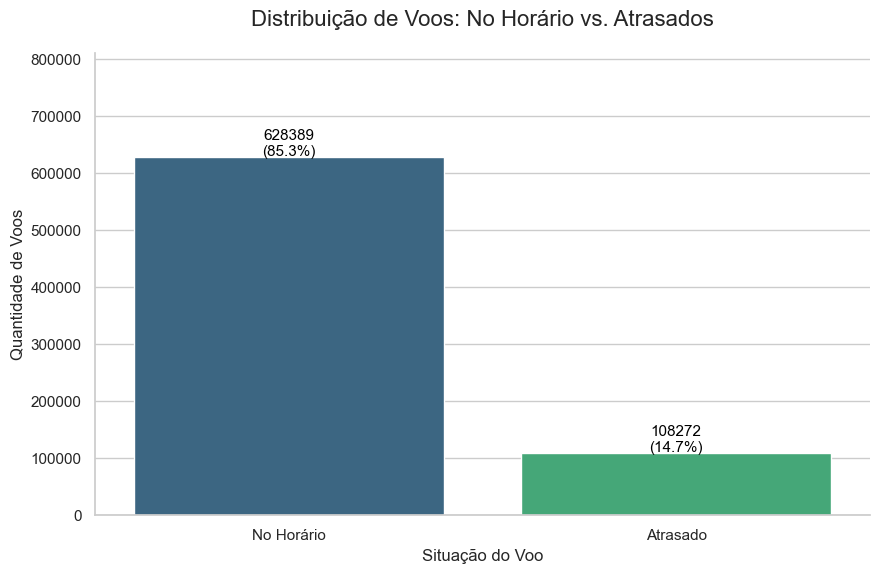

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo
sns.set_theme(style="whitegrid")

# Criando a figura
plt.figure(figsize=(10, 6))

# Criando o gráfico
ax = sns.countplot(x='situacao_voo', data=df, palette='viridis', hue='situacao_voo', legend=False)

# Adicionando títulos e labels
plt.title('Distribuição de Voos: No Horário vs. Atrasados', fontsize=16, pad=20)
plt.xlabel('Situação do Voo', fontsize=12)
plt.ylabel('Quantidade de Voos', fontsize=12)

# Ajustando os rótulos do eixo X
labels = ['No Horário', 'Atrasado']
if len(ax.get_xticklabels()) == len(labels):
    ax.set_xticklabels(labels)

# Calculando o total para as porcentagens
total = len(df)

# Adicionando valores e porcentagens em cima das barras
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{int(height)}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                fontsize=11, color='black',
                xytext=(0, 10), # Um pouco mais de espaço vertical para caber as duas linhas
                textcoords='offset points')

# Aumentando um pouco o limite superior do eixo Y para caber o texto
plt.ylim(0, total * 1.1) 

sns.despine()
plt.show()

# Quais os aeroportos que mais são responsáveis pelos atraos?

C:\Users\Ebenezer Carvalho\AppData\Local\Temp\ipykernel_4936\1295727923.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=delay_by_origin.values, y=delay_by_origin.index, palette="mako")


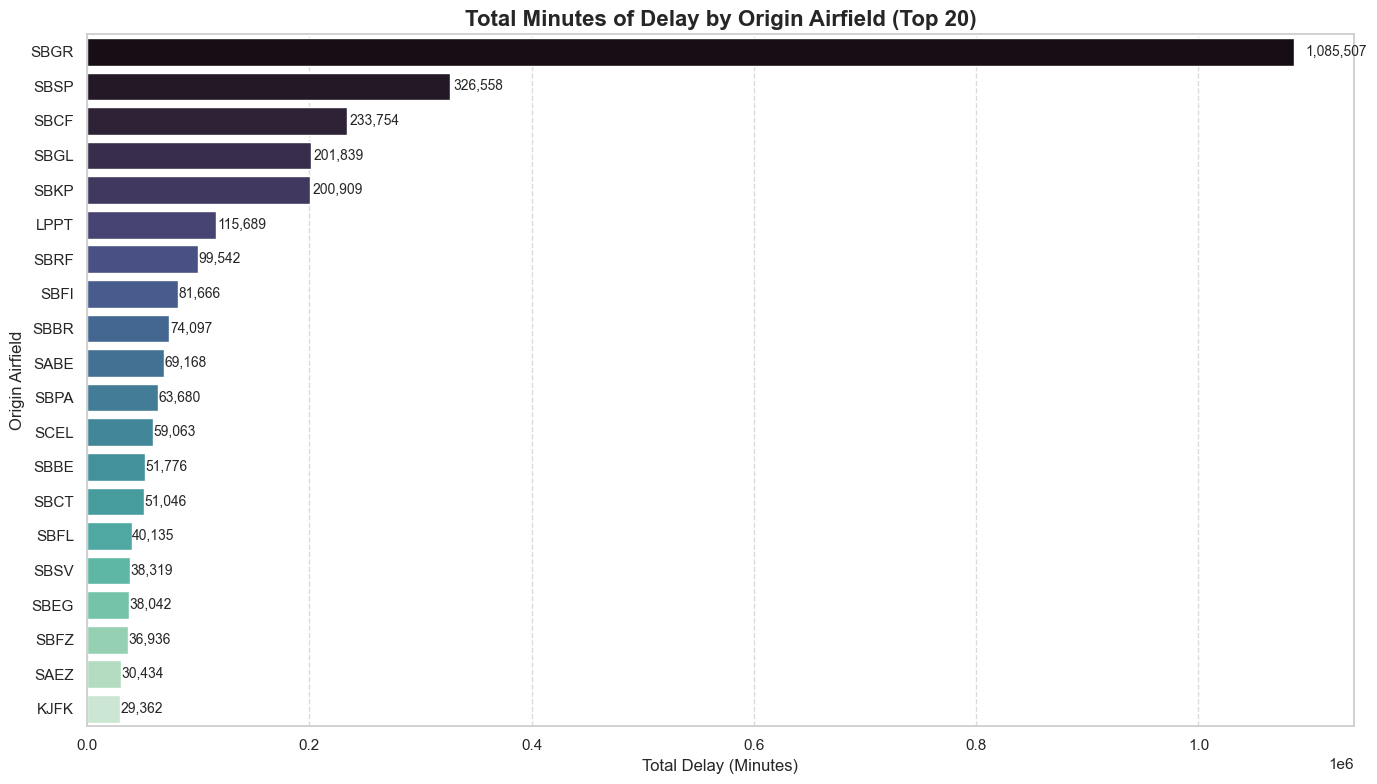

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set style
sns.set_theme(style="whitegrid")
# Prepare data
delay_by_origin = df.groupby('aerodromo_origem')['atraso_minutos'].sum().sort_values(ascending=False).head(20)
# Plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=delay_by_origin.values, y=delay_by_origin.index, palette="mako")
# Aesthetics
plt.title('Total Minutes of Delay by Origin Airfield (Top 20)', fontsize=16, fontweight='bold')
plt.xlabel('Total Delay (Minutes)', fontsize=12)
plt.ylabel('Origin Airfield', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
# Add values to bars
for i, v in enumerate(delay_by_origin.values):
    ax.text(v + (v * 0.01), i, f'{v:,.0f}', va='center', fontsize=10)
plt.tight_layout()
plt.show()

# Horários em que os vôos mais atrasam

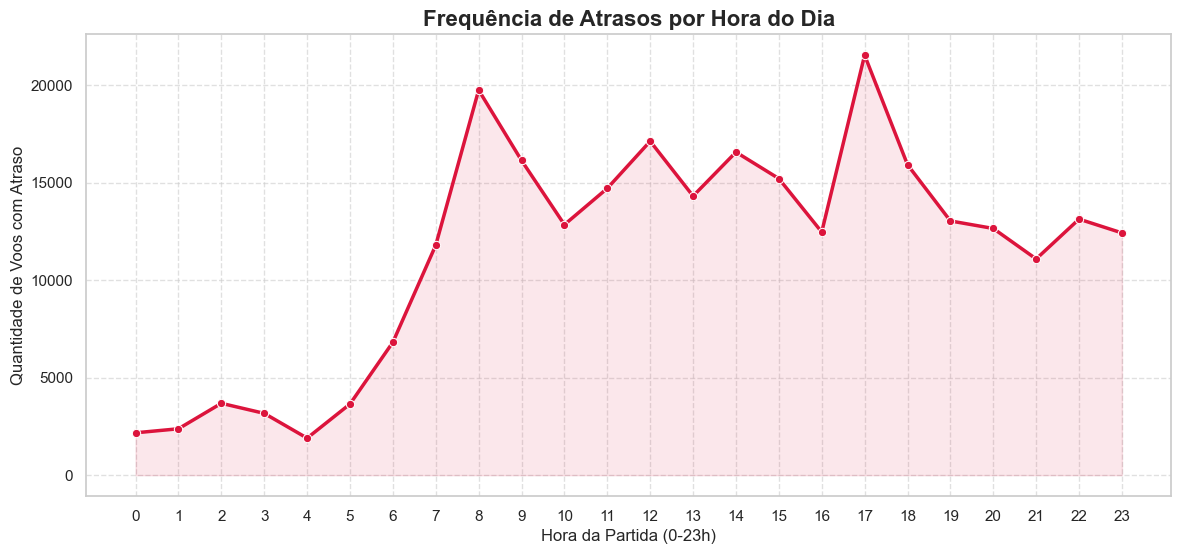

--- Distribuição dos Voos por Período ---
periodo_dia
Tarde        242203
Manhã        235163
Noite        184782
Madrugada     74513
Name: count, dtype: int64


In [8]:
# --- Análise de Horários ---
# Consideraremos um "atraso" qualquer valor > 0 minutos. 
# Se preferir a regra oficial da aviação (>15min), altere para: df['atraso_minutos'] > 15
voos_atrasados = df[df['atraso_minutos'] > 0]
# Contar quantos atrasos ocorrem em cada hora
atrasos_por_hora = voos_atrasados['partida_hora'].value_counts().sort_index()
# Plotar o gráfico de Horários
plt.figure(figsize=(14, 6))
sns.lineplot(x=atrasos_por_hora.index, y=atrasos_por_hora.values, marker='o', linewidth=2.5, color='crimson')
plt.fill_between(atrasos_por_hora.index, atrasos_por_hora.values, color='crimson', alpha=0.1)
plt.title('Frequência de Atrasos por Hora do Dia', fontsize=16, fontweight='bold')
plt.xlabel('Hora da Partida (0-23h)', fontsize=12)
plt.ylabel('Quantidade de Voos com Atraso', fontsize=12)
plt.xticks(range(0, 24)) # Mostrar todas as horas no eixo X
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
# --- Feature Engineering: Criar Coluna 'periodo_dia' ---
def definir_periodo(hora):
    if 6 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora <= 23:
        return 'Noite'
    else:
        return 'Madrugada'
# Aplicar a função para criar a nova coluna no DataFrame principal
df['periodo_dia'] = df['partida_hora'].apply(definir_periodo)
# Verificar a distribuição da nova feature
print("--- Distribuição dos Voos por Período ---")
print(df['periodo_dia'].value_counts())

# horários em que a média de atrasos é maior

C:\Users\Ebenezer Carvalho\AppData\Local\Temp\ipykernel_4936\3384336731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_atraso_por_hora.index, y=media_atraso_por_hora.values, palette="rocket")


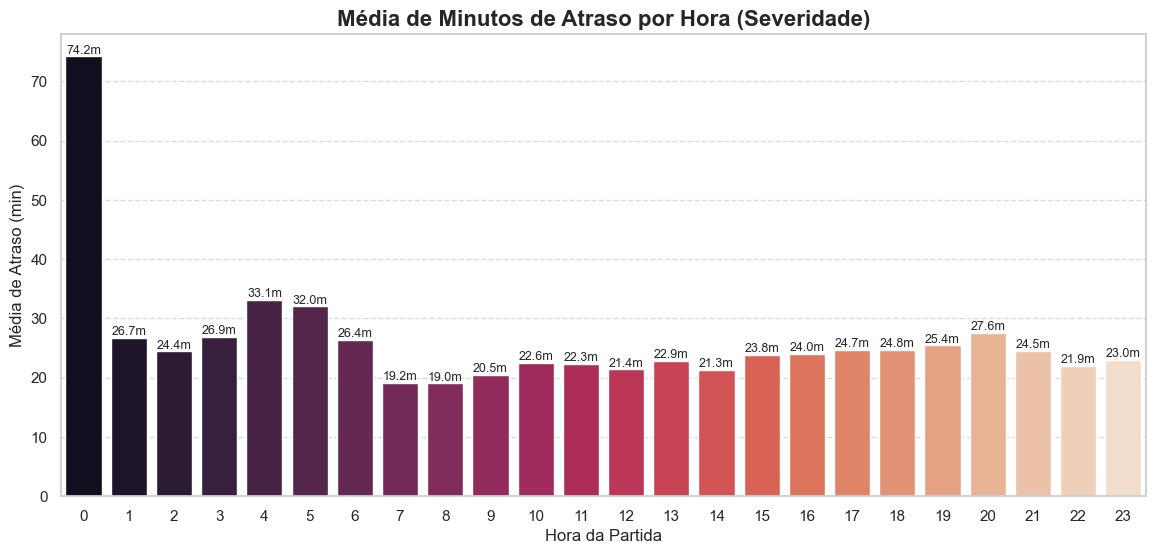

O horário com a maior média de atraso é às 0h, com média de 74.2 minutos.


In [9]:
media_atraso_por_hora = df[df['atraso_minutos'] > 0].groupby('partida_hora')['atraso_minutos'].mean()
# Plotar
plt.figure(figsize=(14, 6))
sns.barplot(x=media_atraso_por_hora.index, y=media_atraso_por_hora.values, palette="rocket")
plt.title('Média de Minutos de Atraso por Hora (Severidade)', fontsize=16, fontweight='bold')
plt.xlabel('Hora da Partida', fontsize=12)
plt.ylabel('Média de Atraso (min)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adicionar valores nas barras
for i, v in enumerate(media_atraso_por_hora.values):
    plt.text(i, v + 0.5, f'{v:.1f}m', ha='center', fontsize=9)
plt.show()
# Resumo em texto
pior_horario = media_atraso_por_hora.idxmax()
maior_media = media_atraso_por_hora.max()
print(f"O horário com a maior média de atraso é às {pior_horario}h, com média de {maior_media:.1f} minutos.")


# dias da semana que mais apresentam atrasos em vôos

C:\Users\Ebenezer Carvalho\AppData\Local\Temp\ipykernel_4936\1308139466.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=atrasos_por_dia.index, y=atrasos_por_dia.values, palette="Blues_d")


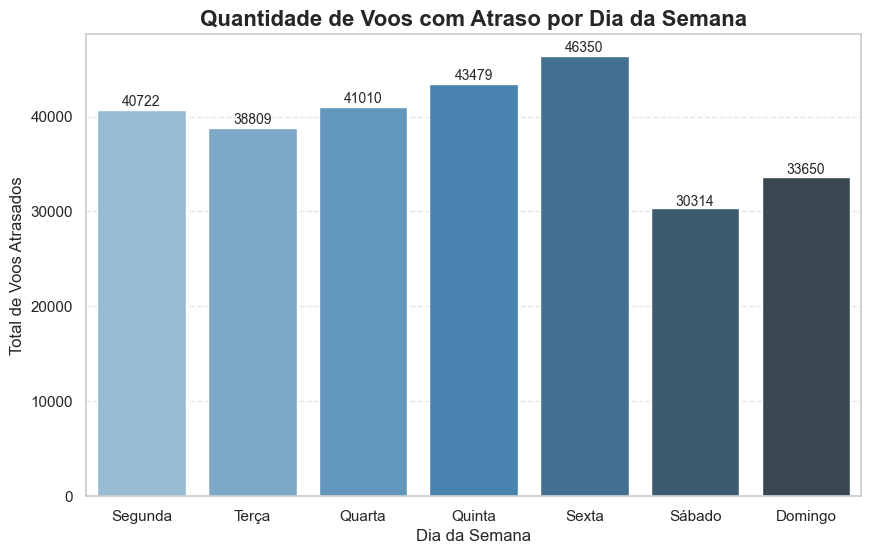

O dia com maior número de atrasos é Sexta, com 46350 ocorrências.


In [10]:
# --- Atrasos por Dia da Semana ---
# 1. Mapear os números para nomes dos dias (0 = Segunda, 6 = Domingo)
mapa_dias = {
    0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: 'Quinta', 
    4: 'Sexta', 5: 'Sábado', 6: 'Domingo'
}
# 2. Filtrar apenas os voos com atraso
voos_com_atraso = df[df['atraso_minutos'] > 0]
# 3. Contar atrasos por dia e reordenar de Segunda a Domingo
atrasos_por_dia = voos_com_atraso['partida_dia_semana'].value_counts().sort_index()
atrasos_por_dia.index = atrasos_por_dia.index.map(mapa_dias)
# 4. Plotar
plt.figure(figsize=(10, 6))
# Usando paleta gradiente para destacar os dias com mais atrasos
sns.barplot(x=atrasos_por_dia.index, y=atrasos_por_dia.values, palette="Blues_d")
plt.title('Quantidade de Voos com Atraso por Dia da Semana', fontsize=16, fontweight='bold')
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Total de Voos Atrasados', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
# Adicionar valores no topo das barras
for i, v in enumerate(atrasos_por_dia.values):
    plt.text(i, v + (v * 0.01), f'{v}', ha='center', fontsize=10)
plt.show()
# Insight rápido
print(f"O dia com maior número de atrasos é {atrasos_por_dia.idxmax()}, com {atrasos_por_dia.max()} ocorrências.")

# Meses que mais possuem atrasos

C:\Users\Ebenezer Carvalho\AppData\Local\Temp\ipykernel_4936\803575972.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=atrasos_por_mes.index, y=atrasos_por_mes.values, palette="coolwarm")


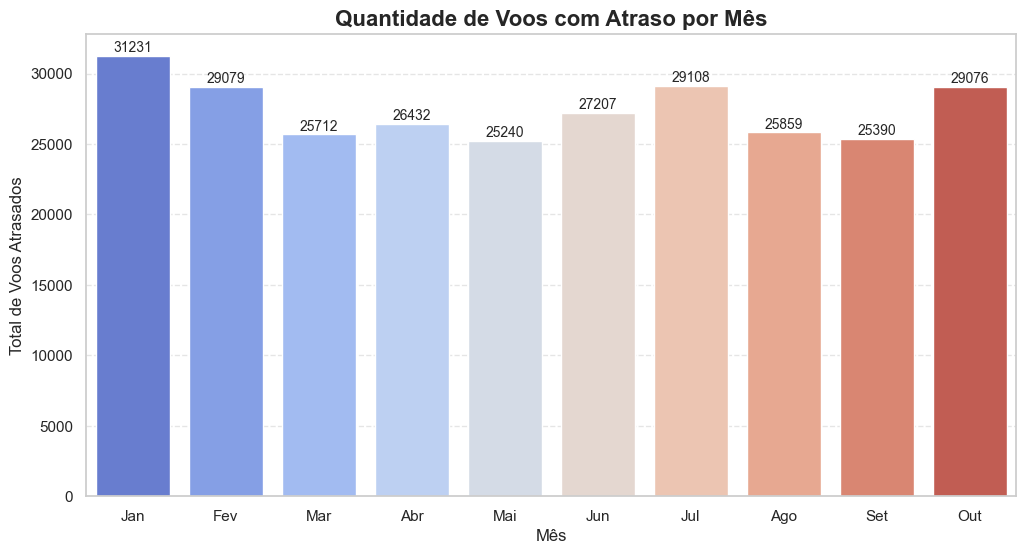

Mês com MAIS atrasos: Jan (31231)
Mês com MENOS atrasos: Mai (25240)


In [11]:
# --- Atrasos por Mês ---
# 1. Mapear os números para nomes dos meses
mapa_meses = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}
# 2. Filtrar apenas os voos com atraso
voos_com_atraso = df[df['atraso_minutos'] > 0]
# 3. Contar atrasos por mês e ordenar pelo índice (mês 1 a 12)
atrasos_por_mes = voos_com_atraso['partida_mes'].value_counts().sort_index()
atrasos_por_mes.index = atrasos_por_mes.index.map(mapa_meses)
# 4. Plotar
plt.figure(figsize=(12, 6))
# Usando paleta 'coolwarm' para sugerir variação de temperatura/intensidade
sns.barplot(x=atrasos_por_mes.index, y=atrasos_por_mes.values, palette="coolwarm")
plt.title('Quantidade de Voos com Atraso por Mês', fontsize=16, fontweight='bold')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Total de Voos Atrasados', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
# Adicionar valores no topo
for i, v in enumerate(atrasos_por_mes.values):
    plt.text(i, v + (v * 0.01), f'{v}', ha='center', fontsize=10)
plt.show()
# Insight: Mês com mais e menos atrasos
print(f"Mês com MAIS atrasos: {atrasos_por_mes.idxmax()} ({atrasos_por_mes.max()})")
print(f"Mês com MENOS atrasos: {atrasos_por_mes.idxmin()} ({atrasos_por_mes.min()})")

# Atrasos por aeroporto de destino

C:\Users\Ebenezer Carvalho\AppData\Local\Temp\ipykernel_4936\3280599246.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=atraso_por_destino.values, y=atraso_por_destino.index, palette="magma")


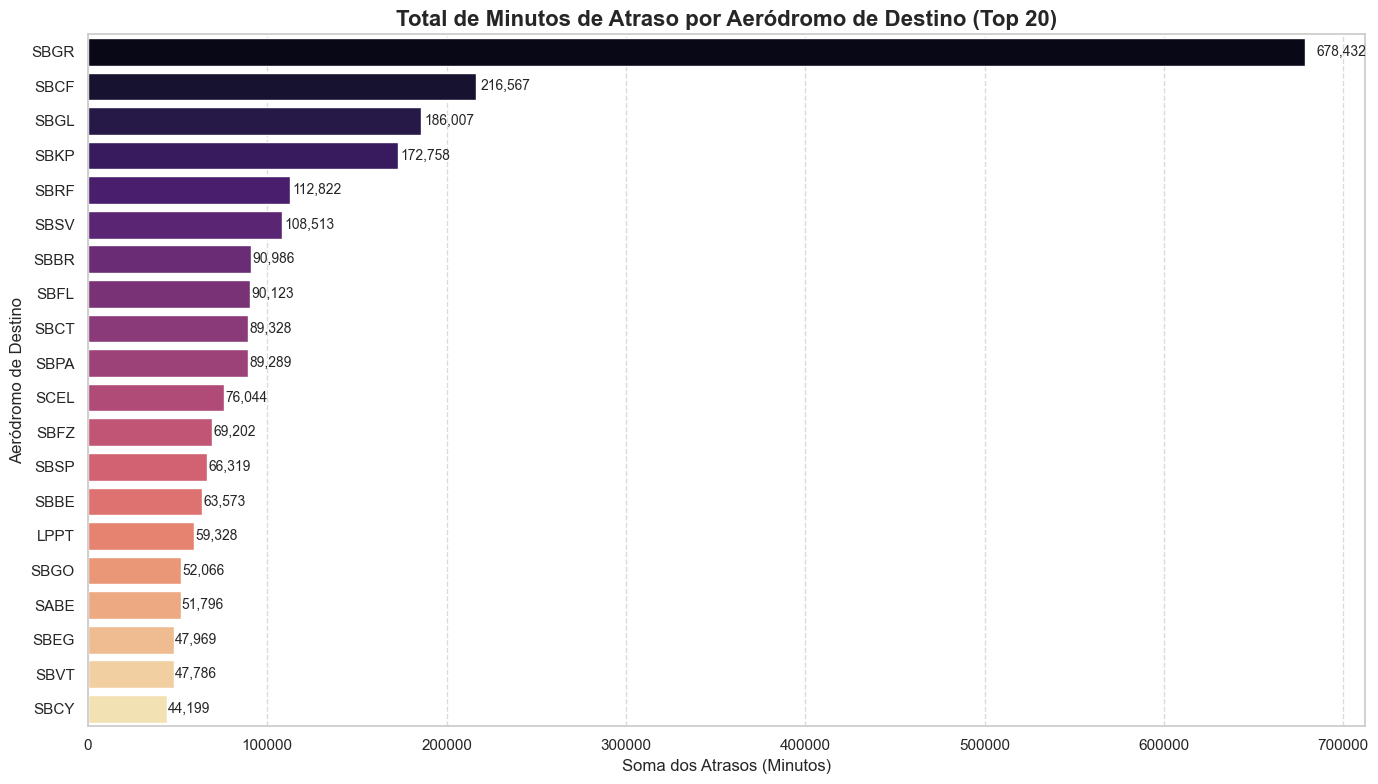

In [12]:
# --- Atrasos por Aeródromo de Destino ---
# 1. Agrupar, somar e pegar os Top 20
atraso_por_destino = df.groupby('aerodromo_destino')['atraso_minutos'].sum().sort_values(ascending=False).head(20)
# 2. Plotar
plt.figure(figsize=(14, 8))
# Usando paleta 'magma' para diferenciar visualmente dos outros gráficos
ax = sns.barplot(x=atraso_por_destino.values, y=atraso_por_destino.index, palette="magma")
plt.title('Total de Minutos de Atraso por Aeródromo de Destino (Top 20)', fontsize=16, fontweight='bold')
plt.xlabel('Soma dos Atrasos (Minutos)', fontsize=12)
plt.ylabel('Aeródromo de Destino', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
# Adicionar valores nas barras
for i, v in enumerate(atraso_por_destino.values):
    ax.text(v + (v * 0.01), i, f'{v:,.0f}', va='center', fontsize=10)
plt.tight_layout()
plt.show()

# inclusão de novas features

In [13]:
import pandas as pd
import numpy as np

# --- 1. Separar Treino e Teste (Obrigatório antes de calcular riscos) ---
# Usamos a data de corte para respeitar a linha do tempo
data_corte = '2025-09-01'
df_train = df[df['partida_prevista'] < data_corte].copy()
df_test  = df[df['partida_prevista'] >= data_corte].copy()

# Alvo
target = 'situacao_voo'

# --- 2. Feature Engineering: Variáveis Temporais ---
# Aplicamos em ambos os dataframes
for d in [df_train, df_test]:
    # Fim de Semana (Sábado=5, Domingo=6)
    d['is_weekend'] = d['partida_dia_semana'].isin([5, 6]).astype(int)
    
    # Alta Temporada (Dez, Jan, Jul) - Ajuste conforme necessidade do negócio
    d['alta_temporada'] = d['partida_mes'].isin([12, 1, 7]).astype(int)

# --- 3. Feature Engineering: Target Encoding (Risco Histórico) ---
# Calculamos as taxas de atraso APENAS no Treino

cols_para_risco = ['aerodromo_origem', 'aerodromo_destino', 'empresa', 'periodo_dia']
mapas_de_risco = {} 

# Taxa global de atrasos no treino (para preencher nulos no teste se surgirem categorias novas)
taxa_base_atraso = df_train[target].mean()

print(f"Taxa Global de Atrasos (Treino): {taxa_base_atraso:.2%}")

for col in cols_para_risco:
    nome_col_risco = f'risco_{col}'
    
    # 1. Aprender no TREINO
    risco_map = df_train.groupby(col)[target].mean()
    mapas_de_risco[col] = risco_map
    
    # 2. Aplicar no TREINO
    df_train[nome_col_risco] = df_train[col].map(risco_map)
    
    # 3. Aplicar no TESTE (usando o aprendizado do treino)
    df_test[nome_col_risco] = df_test[col].map(risco_map).fillna(taxa_base_atraso)

# --- 4. Definição das Features Finais ---
features_finais = [
    'risco_aerodromo_origem', 
    'risco_aerodromo_destino', 
    'risco_empresa', 
    'risco_periodo_dia',
    'is_weekend', 
    'alta_temporada',
    'partida_hora' # Mantemos a hora numérica também
]

print("\n--- Preparação Concluída ---")
print(f"Features: {features_finais}")
print(f"Dimensões Treino: {df_train[features_finais].shape}")
print(f"Dimensões Teste:  {df_test[features_finais].shape}")

# Visualizar exemplo
display(df_train[features_finais + [target]].head())

Taxa Global de Atrasos (Treino): 14.74%

--- Preparação Concluída ---
Features: ['risco_aerodromo_origem', 'risco_aerodromo_destino', 'risco_empresa', 'risco_periodo_dia', 'is_weekend', 'alta_temporada', 'partida_hora']
Dimensões Treino: (589847, 7)
Dimensões Teste:  (146814, 7)


,risco_aerodromo_origem,risco_aerodromo_destino,risco_empresa,risco_periodo_dia,is_weekend,alta_temporada,partida_hora,situacao_voo
0,1.0,0.168109,0.384866,0.186375,0,1,20,1
1,1.0,0.168109,0.384866,0.186375,0,1,20,1
2,1.0,0.168109,0.384866,0.186375,0,1,20,1
3,1.0,0.168109,0.384866,0.186375,0,1,20,1
4,1.0,0.168109,0.384866,0.186375,1,1,20,1


In [14]:
df_train.head()

,empresa,cod_autorizacao,cod_tipo_linha,aerodromo_origem,aerodromo_destino,partida_prevista,atraso_minutos,situacao_voo,partida_hora,partida_dia_semana,partida_mes,periodo_dia,is_weekend,alta_temporada,risco_aerodromo_origem,risco_aerodromo_destino,risco_empresa,risco_periodo_dia
0,AAL,0,I,KDFW,SBGR,2025-01-21 20:25:00,285.0,1,20,1,1,Noite,0,1,1.0,0.168109,0.384866,0.186375
1,AAL,0,I,KDFW,SBGR,2025-01-22 20:25:00,120.0,1,20,2,1,Noite,0,1,1.0,0.168109,0.384866,0.186375
2,AAL,0,I,KDFW,SBGR,2025-01-23 20:25:00,121.0,1,20,3,1,Noite,0,1,1.0,0.168109,0.384866,0.186375
3,AAL,0,I,KDFW,SBGR,2025-01-24 20:25:00,122.0,1,20,4,1,Noite,0,1,1.0,0.168109,0.384866,0.186375
4,AAL,0,I,KDFW,SBGR,2025-01-25 20:25:00,125.0,1,20,5,1,Noite,1,1,1.0,0.168109,0.384866,0.186375


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
import json
# --- 1. Treinamento do Modelo ---
print("Treinando o modelo de Classificação...")
rf_class = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
X_train = df_train[features_finais]
y_train = df_train['situacao_voo']
X_test = df_test[features_finais]
y_test = df_test['situacao_voo']
rf_class.fit(X_train, y_train)
print("Modelo treinado com sucesso!")

Treinando o modelo de Classificação...
Modelo treinado com sucesso!


In [16]:
# --- 2. Avaliação ---
# Probabilidade da classe 1 (Atraso)
y_proba = rf_class.predict_proba(X_test)[:, 1]
y_pred  = (y_proba > 0.5).astype(int) # Threshold padrão de 50%
auc = roc_auc_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)
print(f"\n--- Métricas nos Dados de Teste ---")
print(f"ROC-AUC: {auc:.4f} (Quanto mais próximo de 1.0, melhor a separação entre pontual/atrasado)")
print(f"Acurácia: {acc:.2%}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


--- Métricas nos Dados de Teste ---
ROC-AUC: 0.6808 (Quanto mais próximo de 1.0, melhor a separação entre pontual/atrasado)
Acurácia: 85.57%

Matriz de Confusão:
[[125096    390]
 [ 20799    529]]


In [17]:
# --- 3. Simulador de Endpoint ---
def simular_endpoint(indice_voo):
    """
    Simula uma requisição para o modelo com base em um voo do conjunto de teste.
    """
    # Dados de entrada (Features)
    features_input = X_test.iloc[[indice_voo]]
    
    # Previsão do modelo
    prob_atraso = rf_class.predict_proba(features_input)[0, 1]
    
    # Regra de Negócio: Se probabilidade > 50%, classificamos como Atraso
    status = "Atrasado" if prob_atraso > 0.5 else "Pontual"
    
    # Formato JSON de resposta
    response = {
        "id_voo_teste": int(indice_voo),
        "previsao": status,
        "probabilidade_atraso": round(float(prob_atraso), 4),
        "confianca_percentual": f"{prob_atraso:.1%}"
    }
    
    return json.dumps(response, indent=4)
print("\n--- Teste do Endpoint (Exemplo Real) ---")
# Pegar voos aleatórios do teste para simular
print(simular_endpoint(50))
print(simular_endpoint(100))


--- Teste do Endpoint (Exemplo Real) ---
{
    "id_voo_teste": 50,
    "previsao": "Pontual",
    "probabilidade_atraso": 0.1486,
    "confianca_percentual": "14.9%"
}
{
    "id_voo_teste": 100,
    "previsao": "Pontual",
    "probabilidade_atraso": 0.163,
    "confianca_percentual": "16.3%"
}


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
import json

# --- 1. Treinamento do Modelo ---
print("Treinando o modelo de Classificação...")
rf_class = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

X_train = df_train[features_finais]
y_train = df_train['situacao_voo']

X_test = df_test[features_finais]
y_test = df_test['situacao_voo']

rf_class.fit(X_train, y_train)
print("Modelo treinado com sucesso!")

# --- 2. Avaliação ---
# Probabilidade da classe 1 (Atraso)
y_proba = rf_class.predict_proba(X_test)[:, 1]
y_pred  = (y_proba > 0.5).astype(int) # Threshold padrão de 50%

auc = roc_auc_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)

print(f"\n--- Métricas nos Dados de Teste ---")
print(f"ROC-AUC: {auc:.4f} (Quanto mais próximo de 1.0, melhor a separação entre pontual/atrasado)")
print(f"Acurácia: {acc:.2%}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# --- 3. Simulador de Endpoint ---
def simular_endpoint(indice_voo):
    """
    Simula uma requisição para o modelo com base em um voo do conjunto de teste.
    """
    # Dados de entrada (Features)
    features_input = X_test.iloc[[indice_voo]]
    
    # Previsão do modelo
    prob_atraso = rf_class.predict_proba(features_input)[0, 1]
    
    # Regra de Negócio: Se probabilidade > 50%, classificamos como Atraso
    status = "Atrasado" if prob_atraso > 0.5 else "Pontual"
    
    # Formato JSON de resposta
    response = {
        "id_voo_teste": int(indice_voo),
        "previsao": status,
        "probabilidade_atraso": round(float(prob_atraso), 4),
        "confianca_percentual": f"{prob_atraso:.1%}"
    }
    
    return json.dumps(response, indent=4)

print("\n--- Teste do Endpoint (Exemplo Real) ---")
# Pegar voos aleatórios do teste para simular
print(simular_endpoint(50))
print(simular_endpoint(100))

Treinando o modelo de Classificação...
Modelo treinado com sucesso!

--- Métricas nos Dados de Teste ---
ROC-AUC: 0.6808 (Quanto mais próximo de 1.0, melhor a separação entre pontual/atrasado)
Acurácia: 85.57%

Matriz de Confusão:
[[125096    390]
 [ 20799    529]]

--- Teste do Endpoint (Exemplo Real) ---
{
    "id_voo_teste": 50,
    "previsao": "Pontual",
    "probabilidade_atraso": 0.1486,
    "confianca_percentual": "14.9%"
}
{
    "id_voo_teste": 100,
    "previsao": "Pontual",
    "probabilidade_atraso": 0.163,
    "confianca_percentual": "16.3%"
}


RELATÓRIO DE CLASSIFICAÇÃO COMPLETO
              precision    recall  f1-score   support

     Pontual     0.8574    0.9969    0.9219    125486
    Atrasado     0.5756    0.0248    0.0476     21328

    accuracy                         0.8557    146814
   macro avg     0.7165    0.5108    0.4847    146814
weighted avg     0.8165    0.8557    0.7949    146814



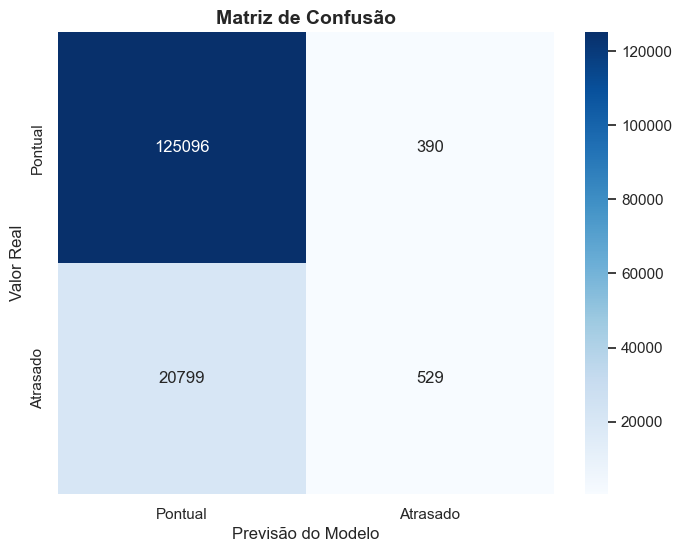


--- Detalhamento da Matriz de Confusão ---
Verdadeiros Negativos (TN): 125,096 (Modelo acertou: voo pontual)
Falsos Positivos (FP): 390 (Modelo ERROU: disse atraso, mas foi pontual)
Falsos Negativos (FN): 20,799 (Modelo ERROU: disse pontual, mas atrasou)
Verdadeiros Positivos (TP): 529 (Modelo acertou: voo atrasou)

Taxa de Falso Alarme: 0.31% (% de vezes que alertou sem necessidade)
Taxa de Voos Perdidos: 97.52% (% de atrasos que NÃO foram previstos)


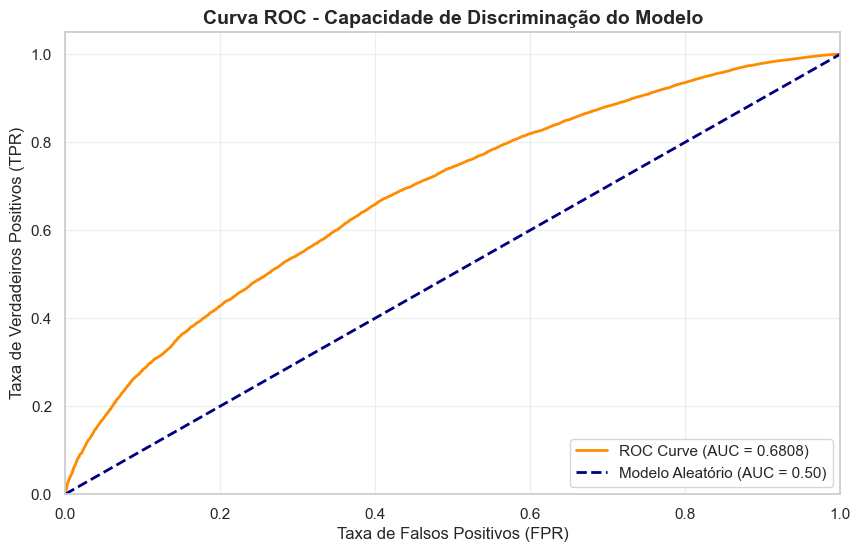

C:\Users\Ebenezer Carvalho\AppData\Local\Temp\ipykernel_4936\4168999186.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


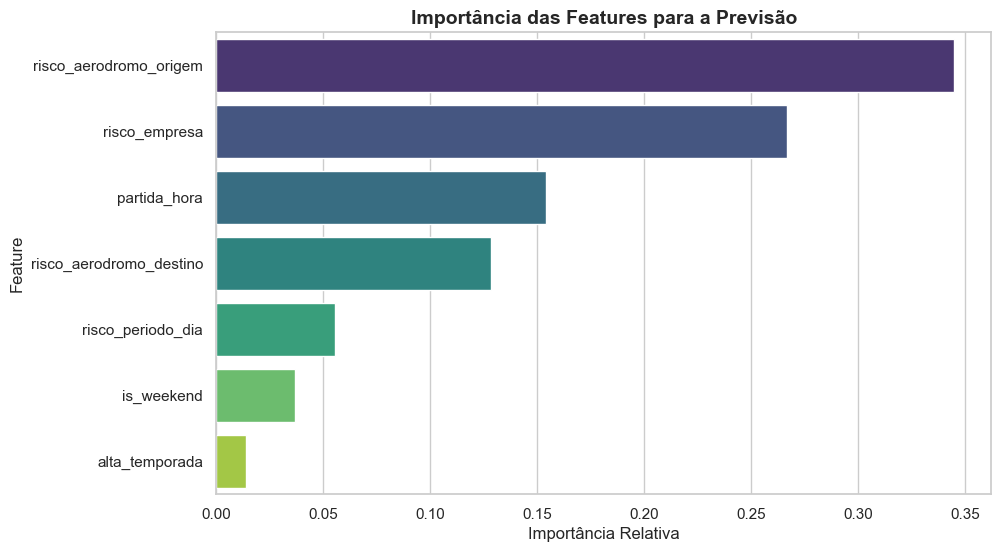


--- Ranking de Importância das Features ---
risco_aerodromo_origem: 0.3450
risco_empresa: 0.2668
partida_hora: 0.1539
risco_aerodromo_destino: 0.1285
risco_periodo_dia: 0.0554
is_weekend: 0.0366
alta_temporada: 0.0138


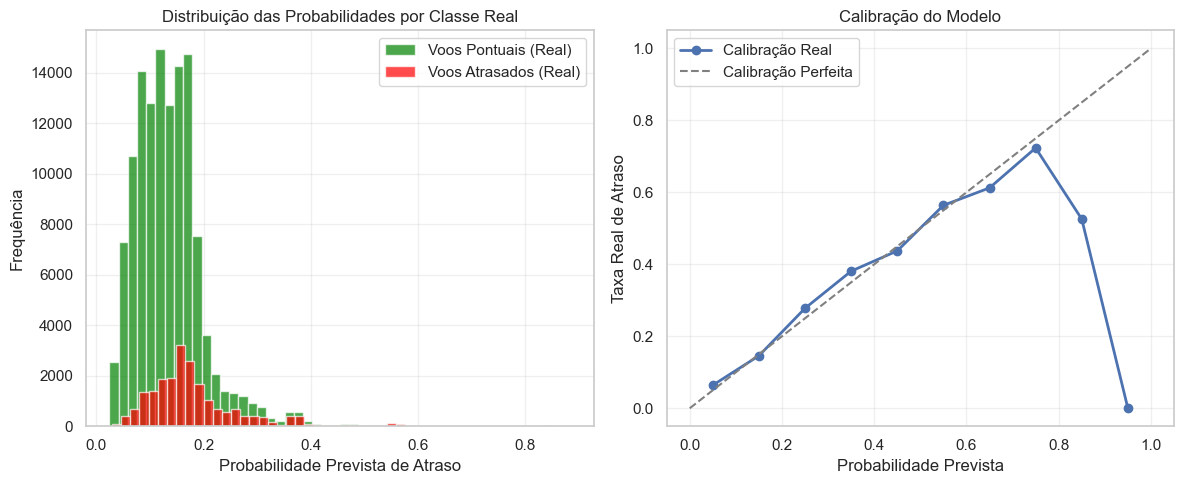


RESUMO EXECUTIVO - O MODELO É CONFIÁVEL?
✓ ROC-AUC: 0.6808
  → FRACA capacidade, considere mais features ou outro modelo

✓ Acurácia Geral: 85.57%
✓ Precisão (Quando diz 'Atraso', está certo em): 57.56%
✓ Recall (Dos atrasos reais, consegue prever): 2.48%


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_curve, roc_auc_score, precision_recall_curve,
                             average_precision_score)
import numpy as np

# --- 1. Relatório de Classificação Detalhado ---
print("=" * 60)
print("RELATÓRIO DE CLASSIFICAÇÃO COMPLETO")
print("=" * 60)
print(classification_report(y_test, y_pred, 
                          target_names=['Pontual', 'Atrasado'], 
                          digits=4))

# --- 2. Matriz de Confusão Visual ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pontual', 'Atrasado'],
            yticklabels=['Pontual', 'Atrasado'])
plt.title('Matriz de Confusão', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Previsão do Modelo')
plt.show()

# --- 3. Interpretação da Matriz de Confusão ---
tn, fp, fn, tp = cm.ravel()
print(f"\n--- Detalhamento da Matriz de Confusão ---")
print(f"Verdadeiros Negativos (TN): {tn:,} (Modelo acertou: voo pontual)")
print(f"Falsos Positivos (FP): {fp:,} (Modelo ERROU: disse atraso, mas foi pontual)")
print(f"Falsos Negativos (FN): {fn:,} (Modelo ERROU: disse pontual, mas atrasou)")
print(f"Verdadeiros Positivos (TP): {tp:,} (Modelo acertou: voo atrasou)")

# Taxa de Erro por Tipo
print(f"\nTaxa de Falso Alarme: {fp/(tn+fp):.2%} (% de vezes que alertou sem necessidade)")
print(f"Taxa de Voos Perdidos: {fn/(fn+tp):.2%} (% de atrasos que NÃO foram previstos)")

# --- 4. Curva ROC (Receiver Operating Characteristic) ---
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Modelo Aleatório (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
plt.title('Curva ROC - Capacidade de Discriminação do Modelo', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# --- 5. Importância das Features ---
importances = pd.Series(rf_class.feature_importances_, index=features_finais).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title('Importância das Features para a Previsão', fontsize=14, fontweight='bold')
plt.xlabel('Importância Relativa', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

print("\n--- Ranking de Importância das Features ---")
for feat, imp in importances.items():
    print(f"{feat}: {imp:.4f}")

# --- 6. Análise de Confiança - Distribuição de Probabilidades ---
plt.figure(figsize=(12, 5))

# Histograma das probabilidades previstas
plt.subplot(1, 2, 1)
plt.hist(y_proba[y_test == 0], bins=50, alpha=0.7, label='Voos Pontuais (Real)', color='green')
plt.hist(y_proba[y_test == 1], bins=50, alpha=0.7, label='Voos Atrasados (Real)', color='red')
plt.xlabel('Probabilidade Prevista de Atraso')
plt.ylabel('Frequência')
plt.title('Distribuição das Probabilidades por Classe Real')
plt.legend()
plt.grid(alpha=0.3)

# Calibração: Probabilidade prevista vs Taxa real
plt.subplot(1, 2, 2)
bins = np.linspace(0, 1, 11)
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_indices = np.digitize(y_proba, bins) - 1
bin_true_prob = [y_test[bin_indices == i].mean() if (bin_indices == i).sum() > 0 else 0 
                 for i in range(len(bins)-1)]

plt.plot(bin_centers, bin_true_prob, 'o-', label='Calibração Real', linewidth=2)
plt.plot([0, 1], [0, 1], '--', label='Calibração Perfeita', color='gray')
plt.xlabel('Probabilidade Prevista')
plt.ylabel('Taxa Real de Atraso')
plt.title('Calibração do Modelo')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# --- 7. Resumo Executivo ---
print("\n" + "=" * 60)
print("RESUMO EXECUTIVO - O MODELO É CONFIÁVEL?")
print("=" * 60)
print(f"✓ ROC-AUC: {auc_score:.4f}")
if auc_score > 0.80:
    print("  → EXCELENTE capacidade de separar voos pontuais de atrasados")
elif auc_score > 0.70:
    print("  → BOA capacidade, mas há margem para melhoria")
else:
    print("  → FRACA capacidade, considere mais features ou outro modelo")

print(f"\n✓ Acurácia Geral: {acc:.2%}")
print(f"✓ Precisão (Quando diz 'Atraso', está certo em): {tp/(tp+fp):.2%}")
print(f"✓ Recall (Dos atrasos reais, consegue prever): {tp/(tp+fn):.2%}")

# swalvando o modelo

import joblib
from datetime import datetime
import os

# --- 1. Preparar Pacote Completo para Salvar ---
# Tudo que o endpoint vai precisar para fazer previsões
modelo_completo = {
    'modelo': rf_class,
    'mapas_de_risco': mapas_de_risco,
    'features_finais': features_finais,
    'taxa_base_atraso': taxa_base_atraso,
    'data_treinamento': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'metricas': {
        'roc_auc': auc_score,
        'acuracia': acc
    }
}

# --- 2. Salvar no Disco ---
nome_arquivo = 'modelo_flight_delay.pkl'
joblib.dump(modelo_completo, nome_arquivo)

print(f"✓ Modelo salvo com sucesso em: {nome_arquivo}")
print(f"  Tamanho do arquivo: {os.path.getsize(nome_arquivo) / (1024*1024):.2f} MB")

In [21]:
import joblib
import pandas as pd

# --- Carregar o modelo ---
modelo_completo = joblib.load('modelo_flight_delay.pkl')

# Extrair componentes
rf_class = modelo_completo['modelo']
mapas_de_risco = modelo_completo['mapas_de_risco']
features_finais = modelo_completo['features_finais']
taxa_base_atraso = modelo_completo['taxa_base_atraso']

print(f"✓ Modelo carregado. Treinado em: {modelo_completo['data_treinamento']}")
print(f"  ROC-AUC: {modelo_completo['metricas']['roc_auc']:.4f}")

# --- Função para processar um novo voo ---
def prever_atraso(dados_voo):
    """
    dados_voo: dict com chaves:
    {
        'aerodromo_origem': 'SBGR',
        'aerodromo_destino': 'SBSP',
        'empresa': 'GOL',
        'periodo_dia': 'Manhã',
        'partida_hora': 8,
        'partida_dia_semana': 0,  # Segunda
        'partida_mes': 12
    }
    """
    # 1. Criar DataFrame
    df_input = pd.DataFrame([dados_voo])
    
    # 2. Aplicar Features Temporais
    df_input['is_weekend'] = df_input['partida_dia_semana'].isin([5, 6]).astype(int)
    df_input['alta_temporada'] = df_input['partida_mes'].isin([12, 1, 7]).astype(int)
    
    # 3. Aplicar Target Encoding (usando os mapas salvos)
    for col in ['aerodromo_origem', 'aerodromo_destino', 'empresa', 'periodo_dia']:
        nome_col_risco = f'risco_{col}'
        df_input[nome_col_risco] = df_input[col].map(mapas_de_risco[col]).fillna(taxa_base_atraso)
    
    # 4. Selecionar features na ordem correta
    X_input = df_input[features_finais]
    
    # 5. Fazer previsão
    prob_atraso = rf_class.predict_proba(X_input)[0, 1]
    status = "Atrasado" if prob_atraso > 0.5 else "Pontual"
    
    return {
        "previsao": status,
        "probabilidade": round(float(prob_atraso), 4)
    }

# --- Teste com um voo exemplo ---
voo_teste = {
    'aerodromo_origem': 'SBGR',
    'aerodromo_destino': 'SBRJ',
    'empresa': 'LATAM',
    'periodo_dia': 'Tarde',
    'partida_hora': 14,
    'partida_dia_semana': 4,  # Sexta
    'partida_mes': 12  # Dezembro
}

resultado = prever_atraso(voo_teste)
print(f"\nPrevisão: {resultado}")

FileNotFoundError: [Errno 2] No such file or directory: 'modelo_flight_delay.pkl'

In [22]:
# CÓDIGO MELHORADO PARA O NOTEBOOK (Copie e cole nas células correspondentes)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
import json
import pandas as pd

# --- 1. Treinamento do Modelo (COM AJUSTES PARA MAIOR SENSIBILIDADE) ---
print("Treinando o modelo de Classificação (Modo 'Ousado')...")

Treinando o modelo de Classificação (Modo 'Ousado')...


In [23]:
# MUDANÇA PRINCIPAL 1: class_weight='balanced'
# Isso força o modelo a dar mais importância para a classe minoritária (Atrasos)
rf_class = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10, 
    random_state=42, 
    n_jobs=-1,
    class_weight='balanced' 
)

In [24]:
# (Assumindo que X_train e y_train já foram definidos nas células anteriores do notebook)
rf_class.fit(X_train, y_train)
print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


In [25]:
# --- 2. Avaliação (COM NOVO THRESHOLD) ---
# Probabilidade da classe 1 (Atraso)
y_proba = rf_class.predict_proba(X_test)[:, 1]

In [26]:
# MUDANÇA PRINCIPAL 2: Threshold ajustado para 0.40 (40%)
# O padrão é 0.50 (50%). Baixando para 40%, o modelo vai prever "Atraso" mais vezes.
# Combinado com o class_weight='balanced', isso deve aumentar drasticamente o número de atrasos detectados.
THRESHOLD = 0.40 
y_pred  = (y_proba > THRESHOLD).astype(int)

In [27]:
auc = roc_auc_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)

print(f"\n--- Métricas nos Dados de Teste (Threshold {THRESHOLD}) ---")
print(f"ROC-AUC: {auc:.4f}")
print(f"Acurácia: {acc:.2%}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


--- Métricas nos Dados de Teste (Threshold 0.4) ---
ROC-AUC: 0.6821
Acurácia: 42.20%

Matriz de Confusão:
[[43751 81735]
 [ 3122 18206]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.35      0.51    125486
           1       0.18      0.85      0.30     21328

    accuracy                           0.42    146814
   macro avg       0.56      0.60      0.40    146814
weighted avg       0.82      0.42      0.48    146814



In [28]:
# --- 3. Simulador de Endpoint (ATUALIZADO) ---
def simular_endpoint(indice_voo):
    """
    Simula uma requisição para o modelo com base em um voo do conjunto de teste.
    """
    # Dados de entrada (Features)
    features_input = X_test.iloc[[indice_voo]]
    
    # Previsão do modelo
    prob_atraso = rf_class.predict_proba(features_input)[0, 1]
    
    # Regra de Negócio Atualizada: Usar o mesmo Threshold do treino (0.40)
    status = "Atrasado" if prob_atraso > 0.40 else "Pontual"
    
    # Formato JSON de resposta
    response = {
        "id_voo_teste": int(indice_voo),
        "previsao": status,
        "probabilidade_atraso": round(float(prob_atraso), 4),
        "confianca_percentual": f"{prob_atraso:.1%}"
    }
    
    return json.dumps(response, indent=4)

print("\n--- Teste do Endpoint (Exemplo Real) ---")
# Pegar voos aleatórios do teste para simular
print(simular_endpoint(50))
print(simular_endpoint(100))


--- Teste do Endpoint (Exemplo Real) ---
{
    "id_voo_teste": 50,
    "previsao": "Atrasado",
    "probabilidade_atraso": 0.4967,
    "confianca_percentual": "49.7%"
}
{
    "id_voo_teste": 100,
    "previsao": "Atrasado",
    "probabilidade_atraso": 0.5319,
    "confianca_percentual": "53.2%"
}


In [29]:
import joblib
from datetime import datetime
import os

# --- 1. Preparar Pacote Completo para Salvar ---
# Tudo que o endpoint vai precisar para fazer previsões
modelo_completo = {
    'modelo': rf_class,
    'mapas_de_risco': mapas_de_risco,
    'features_finais': features_finais,
    'taxa_base_atraso': taxa_base_atraso,
    'data_treinamento': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'metricas': {
        'roc_auc': auc_score,
        'acuracia': acc
    }
}

# --- 2. Salvar no Disco ---
nome_arquivo = 'ml-api/modelo_flight_delay.pkl'
joblib.dump(modelo_completo, nome_arquivo)

print(f"✓ Modelo salvo com sucesso em: {nome_arquivo}")
print(f"  Tamanho do arquivo: {os.path.getsize(nome_arquivo) / (1024*1024):.2f} MB")

✓ Modelo salvo com sucesso em: ml-api/modelo_flight_delay.pkl
  Tamanho do arquivo: 12.16 MB
